In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('authors_affiliations_dataset.csv')

author_count_by_affiliation = df.groupby('affiliation').size().reset_index(name='Author Count')

author_count_by_affiliation = author_count_by_affiliation.sort_values('Author Count', ascending=False)

print(author_count_by_affiliation)

                               affiliation  Author Count
48                         Google Research            24
59                                     IBM            23
47                                  Google            21
88                                    Meta            16
151               University of Washington            10
..                                     ...           ...
56   Health Research Authority, London, UK             1
54     Harrison.ai, Sydney, NSW, Australia             1
53                               Graphcore             1
52          Google, Mountain View, CA, USA             1
159            metaLAB, Harvard University             1

[160 rows x 2 columns]


In [3]:
df = pd.read_csv('authors_affiliations_dataset.csv')

author_count_detailed = df.groupby(['affiliation', 'affiliation_type']).size().reset_index(name='Author Count')

author_count_detailed = author_count_detailed.sort_values('Author Count', ascending=False)

print(author_count_detailed)

print(f"\nTotal unique affiliations: {df['affiliation'].nunique()}")
print(f"\nAuthor count by affiliation type:")
print(df.groupby('affiliation_type').size())

                               affiliation affiliation_type  Author Count
48                         Google Research         Industry            24
59                                     IBM         Industry            23
47                                  Google         Industry            21
88                                    Meta         Industry            16
153               University of Washington         Academia            10
..                                     ...              ...           ...
56   Health Research Authority, London, UK       Government             1
54     Harrison.ai, Sydney, NSW, Australia         Industry             1
53                               Graphcore         Industry             1
52          Google, Mountain View, CA, USA         Industry             1
161            metaLAB, Harvard University         Academia             1

[162 rows x 3 columns]

Total unique affiliations: 160

Author count by affiliation type:
affiliation_type
Acad

In [4]:
affiliation_type_counts = df['affiliation_type'].value_counts()
print("Author counts by affiliation type:")
print(affiliation_type_counts)
print()

total_authors = len(df)
print(f"Total authors: {total_authors}")
print()

proportions = df['affiliation_type'].value_counts(normalize=True) * 100
print("Proportions by affiliation type (%):")
print(proportions)
print()

academia_count = len(df[df['affiliation_type'] == 'Academia'])
industry_count = len(df[df['affiliation_type'] == 'Industry'])

print(f"Academia authors: {academia_count} ({academia_count/total_authors*100:.2f}%)")
print(f"Industry authors: {industry_count} ({industry_count/total_authors*100:.2f}%)")
print()

# Calculate the ratio Academia / Industry
if industry_count > 0:
    ratio = academia_count / industry_count
    print(f"Academia to Industry ratio: {ratio:.2f}:1")
    print(f"This means for every 1 industry author, there are {ratio:.2f} academia authors")
else:
    print("No industry authors found")

Author counts by affiliation type:
affiliation_type
Academia          180
Industry          139
Government         20
Non-for-profit     13
Other               1
Name: count, dtype: int64

Total authors: 353

Proportions by affiliation type (%):
affiliation_type
Academia          50.991501
Industry          39.376771
Government         5.665722
Non-for-profit     3.682720
Other              0.283286
Name: proportion, dtype: float64

Academia authors: 180 (50.99%)
Industry authors: 139 (39.38%)

Academia to Industry ratio: 1.29:1
This means for every 1 industry author, there are 1.29 academia authors


                  Count  Percentage
affiliation_type                   
Academia            180   50.991501
Industry            139   39.376771
Government           20    5.665722
Non-for-profit       13    3.682720
Other                 1    0.283286

Academia: 180 authors (50.99%)
Industry: 139 authors (39.38%)
Academia to Industry ratio: 1.29:1


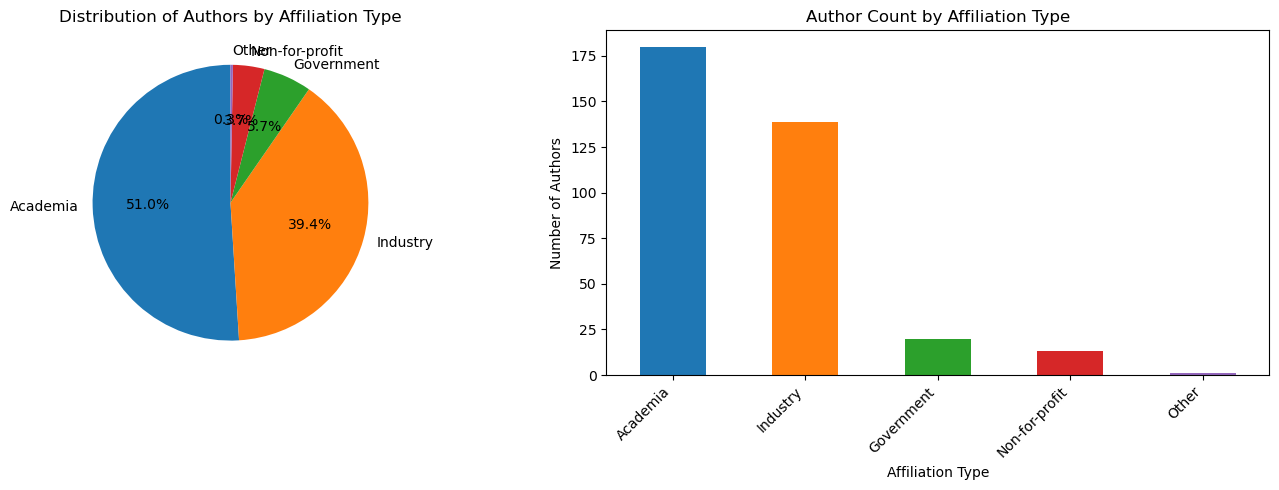

In [5]:
# Create a comprehensive comparison
affiliation_counts = df['affiliation_type'].value_counts()
affiliation_proportions = df['affiliation_type'].value_counts(normalize=True) * 100

# Create a summary DataFrame
summary = pd.DataFrame({
    'Count': affiliation_counts,
    'Percentage': affiliation_proportions
})

print(summary)
print()

academia_count = len(df[df['affiliation_type'] == 'Academia'])
industry_count = len(df[df['affiliation_type'] == 'Industry'])
total_authors = len(df)

print(f"Academia: {academia_count} authors ({academia_count/total_authors*100:.2f}%)")
print(f"Industry: {industry_count} authors ({industry_count/total_authors*100:.2f}%)")
print(f"Academia to Industry ratio: {academia_count/industry_count:.2f}:1")

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].pie(affiliation_counts, labels=affiliation_counts.index, autopct='%1.1f%%', startangle=90)
axes[0].set_title('Distribution of Authors by Affiliation Type')

affiliation_counts.plot(kind='bar', ax=axes[1], color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd'])
axes[1].set_title('Author Count by Affiliation Type')
axes[1].set_xlabel('Affiliation Type')
axes[1].set_ylabel('Number of Authors')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

In [ ]:
print("=" * 80)
print("BASIC STATISTICS")
print("=" * 80)

total_authors = len(df)
print(f"Total author entries: {total_authors}")

affiliation_counts = df['affiliation_type'].value_counts()
print("\nUnweighted author counts by affiliation type:")
print(affiliation_counts)
print()

unweighted_proportions = df['affiliation_type'].value_counts(normalize=True) * 100
print("Unweighted proportions (%):")
for aff_type, prop in unweighted_proportions.items():
    print(f"  {aff_type}: {prop:.2f}%")

print("\n" + "=" * 80)
print("WEIGHTED ANALYSIS BY PAPER")
print("=" * 80)

#  Weighted proportions 
paper_weights = []

for paper_name, paper_df in df.groupby('paper'):
    total_authors_in_paper = len(paper_df)

    type_counts = paper_df['affiliation_type'].value_counts()

    for aff_type, count in type_counts.items():
        proportion_in_paper = count / total_authors_in_paper
        paper_weights.append({
            'paper': paper_name,
            'affiliation_type': aff_type,
            'count': count,
            'total_authors': total_authors_in_paper,
            'proportion': proportion_in_paper
        })

paper_weights_df = pd.DataFrame(paper_weights)

# Each paper contributes equally (weight = 1/number_of_papers)
weighted_proportions = paper_weights_df.groupby('affiliation_type')['proportion'].mean() * 100

print("\nWeighted proportions by paper (each paper weighted equally):")
for aff_type, prop in weighted_proportions.sort_values(ascending=False).items():
    print(f"  {aff_type}: {prop:.2f}%")

print("\n" + "=" * 80)
print("ACADEMIA vs INDUSTRY COMPARISON")
print("=" * 80)

academia_unweighted = affiliation_counts.get('Academia', 0)
industry_unweighted = affiliation_counts.get('Industry', 0)

academia_weighted = weighted_proportions.get('Academia', 0)
industry_weighted = weighted_proportions.get('Industry', 0)

print("\nUNWEIGHTED (counting all author entries):")
print(f"  Academia: {academia_unweighted} authors ({academia_unweighted/total_authors*100:.2f}%)")
print(f"  Industry: {industry_unweighted} authors ({industry_unweighted/total_authors*100:.2f}%)")
if industry_unweighted > 0:
    print(f"  Ratio Academia:Industry = {academia_unweighted/industry_unweighted:.2f}:1")

print("\nWEIGHTED (averaging proportions across papers):")
print(f"  Academia: {academia_weighted:.2f}%")
print(f"  Industry: {industry_weighted:.2f}%")
if industry_weighted > 0:
    print(f"  Ratio Academia:Industry = {academia_weighted/industry_weighted:.2f}:1")

print("\n" + "=" * 80)
print("PAPER-LEVEL DETAILS")
print("=" * 80)

papers_by_type = paper_weights_df.groupby('affiliation_type')['paper'].nunique()
total_papers = df['paper'].nunique()

print(f"\nTotal papers in dataset: {total_papers}")
print("\nNumber of papers with at least one author from each affiliation type:")
for aff_type, count in papers_by_type.sort_values(ascending=False).items():
    print(f"  {aff_type}: {count} papers ({count/total_papers*100:.2f}%)")

print("\nPapers with authors from multiple affiliation types:")
papers_with_mixed = df.groupby('paper')['affiliation_type'].nunique()
mixed_papers = papers_with_mixed[papers_with_mixed > 1]
print(f"  {len(mixed_papers)} papers ({len(mixed_papers)/total_papers*100:.2f}%)")

print("\nExamples of papers with both Academia and Industry authors:")
academia_industry_papers = []
for paper_name, paper_df in df.groupby('paper'):
    types = set(paper_df['affiliation_type'].unique())
    if 'Academia' in types and 'Industry' in types:
        academia_count = len(paper_df[paper_df['affiliation_type'] == 'Academia'])
        industry_count = len(paper_df[paper_df['affiliation_type'] == 'Industry'])
        academia_industry_papers.append({
            'paper': paper_name,
            'academia_authors': academia_count,
            'industry_authors': industry_count,
            'total_authors': len(paper_df)
        })

mixed_df = pd.DataFrame(academia_industry_papers)
if len(mixed_df) > 0:
    print(f"\nFound {len(mixed_df)} papers with both Academia and Industry authors")
    print("\nFirst 5 examples:")
    print(mixed_df.head())

BASIC STATISTICS
Total author entries: 353

Unweighted author counts by affiliation type:
affiliation_type
Academia          180
Industry          139
Government         20
Non-for-profit     13
Other               1
Name: count, dtype: int64

Unweighted proportions (%):
  Academia: 50.99%
  Industry: 39.38%
  Government: 5.67%
  Non-for-profit: 3.68%
  Other: 0.28%

WEIGHTED ANALYSIS BY PAPER

Weighted proportions by paper (each paper weighted equally):
  Academia: 79.49%
  Industry: 69.93%
  Non-for-profit: 28.81%
  Government: 25.79%
  Other: 1.96%

ACADEMIA vs INDUSTRY COMPARISON

UNWEIGHTED (counting all author entries):
  Academia: 180 authors (50.99%)
  Industry: 139 authors (39.38%)
  Ratio Academia:Industry = 1.29:1

WEIGHTED (averaging proportions across papers):
  Academia: 79.49%
  Industry: 69.93%
  Ratio Academia:Industry = 1.14:1

PAPER-LEVEL DETAILS

Total papers in dataset: 59

Number of papers with at least one author from each affiliation type:
  Academia: 46 papers 